<a href="https://colab.research.google.com/github/gunman-vagabond/python_colaboratory/blob/master/gunmanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2019-01-19 16:52:42--  http://fc.jpn.org/ryuba/gunman/keras/gunmanRecognition/gunmanRecognition.json
Resolving fc.jpn.org (fc.jpn.org)... 59.106.13.159
Connecting to fc.jpn.org (fc.jpn.org)|59.106.13.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4988 (4.9K) [application/json]
Saving to: ‘gunmanRecognition.json’

gunmanRecognition.j 100%[===================>]   4.87K  31.5KB/s    in 0.2s    

2019-01-19 16:52:43 (31.5 KB/s) - ‘gunmanRecognition.json’ saved [4988/4988]

--2019-01-19 16:52:44--  http://fc.jpn.org/ryuba/gunman/keras/gunmanRecognition/gunmanRecognition.h5
Resolving fc.jpn.org (fc.jpn.org)... 59.106.13.159
Connecting to fc.jpn.org (fc.jpn.org)|59.106.13.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16166800 (15M)
Saving to: ‘gunmanRecognition.h5’

gunmanRecognition.h 100%[===================>]  15.42M  1.03MB/s    in 6.9s    

2019-01-19 16:52:51 (2.24 MB/s) - ‘gunmanRecognition.h5’ saved [16166800/16166800]

--

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
__________

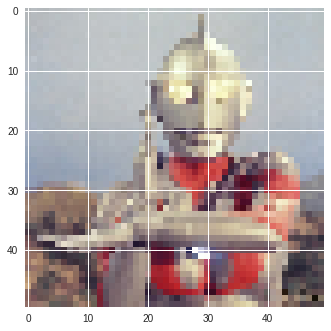

I think this image is a 'ultraman'.


In [0]:
!pip install keras==2.2.4

!wget http://fc.jpn.org/ryuba/gunman/keras/gunmanRecognition/gunmanRecognition.json -O gunmanRecognition.json
!wget http://fc.jpn.org/ryuba/gunman/keras/gunmanRecognition/gunmanRecognition.h5 -O gunmanRecognition.h5
#!wget http://fc.jpn.org/ryuba/gunman/pic/Gunman.jpg -O testImage.jpg
!wget https://animeanime.jp/imgs/p/jtKDOVlKAvjRrNw8SXAVejagI61Nrq_oqaqr/146856.jpg -O testImage.jpg
!ls -la

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import model_from_json

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import os.path

image_size = 50
image = Image.open("testImage.jpg")
image = image.convert("RGB")
image = image.resize((image_size, image_size))
data = np.asarray(image)

X = []
X.append(data)
X = np.array(X)

X = X.astype('float32')
X = X / 255.0

#model = load_model('gunmanRecognition.h5')


f_model = "./"
model_filename = "gunmanRecognition.json"
weights_filename = "gunmanRecognition.h5"

json_string = open(os.path.join(f_model, model_filename)).read()
model = model_from_json(json_string)

model.summary()

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.5), metrics=['accuracy'])
model.load_weights(os.path.join(f_model,weights_filename))

ret = model.predict(X, batch_size=1)
print("predict ret:", ret , " (gunman, ultraman, rider, precure)")

import matplotlib.pyplot as plt
from matplotlib import cm

#plt.imshow(X.reshape(50, 50), cmap=cm.gray_r)
plt.imshow(image, cmap=cm.gray_r)
plt.show()

bestscore = 0.0
bestnum = 0
for n in [0,1,2,3]:
    if bestscore < ret[0][n]:
        bestscore = ret[0][n]
        bestnum = n

category = ["gunman", "ultraman", "rider", "precure"]
        
print("I think this image is a '" + category[bestnum] + "'.")